Importing the Necessary Libraries 

In [ ]:
#1 TensorFlow and tf.keras, used for 
import tensorflow as tf

In [ ]:
#2 Helper libraries
import numpy as np
import matplotlib.pyplot as plt


Loading the MNIST Dataset

In [ ]:
#3 Load Fashion MNIST Dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Map the the integer labels with items on the list.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot', 'Abaya', 'thobe']

Preprocessing and Scaling

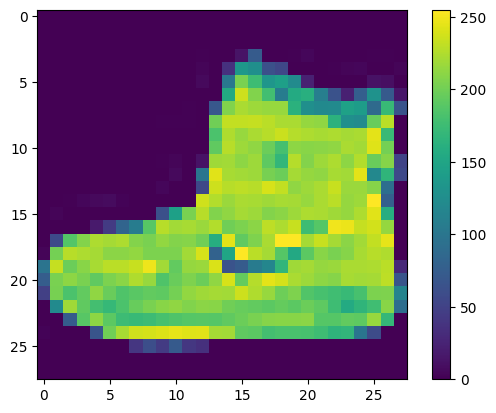

In [ ]:
#4 Show the Nature of the Data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [ ]:
#5 Scaling the Data to  be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

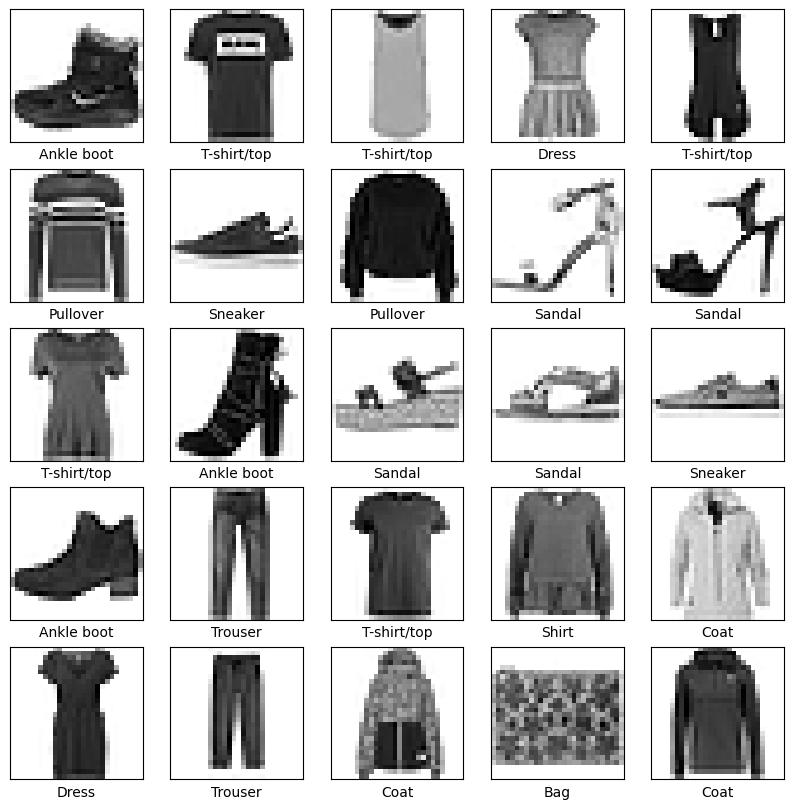

In [ ]:
#6 Verifying the Data is in the Correct Format 
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
print(train_images.shape)

(60000, 28, 28)


Building the Model: Building the neural network requires configuring the layers of the model, then compiling the model.




In [ ]:
#7 set up a neural network model with three layers:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Compiling the Model


In [ ]:
#8 compiling the model:
# here we add the loss function, the optimizer, and the metrics
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training the Model: 
1. Feed the Training Data
2. Learn to associate images and labels
3. Ask the model too make predictions
4. verify the predictions 

```



In [ ]:
#9  Feed the model 
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4980 - accuracy: 0.8256
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3786 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3397 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3153 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2968 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2842 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2719 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2588 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2511 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2

In [ ]:
#10 evaluate the accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc) # this is the accuracy on the test data, which represents overfitting. the model is performing worse on new previouosly unseen inputs than it does on the training data
#an overfitted data memorized the ooise and details in the training dataset


313/313 - 1s - loss: 0.3316 - accuracy: 0.8869 - 633ms/epoch - 2ms/step

Test accuracy: 0.886900007724762


In [ ]:
#11 make predictions

# we attach a softmax layer to convert the model's linear outputs logits—to probabilities, which should be easier to interpret.

probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])





In [ ]:
# 12 
predictions = probability_model.predict(test_images)


313/313 [==============================] - 1s 2ms/step


In [ ]:
# 13
print(predictions[0])


[4.0294768e-09 1.1347476e-11 8.3646779e-12 1.6920382e-13 1.0938308e-11
 1.9732243e-04 2.8136118e-10 1.9702627e-03 1.8600050e-08 9.9783236e-01]


In [ ]:
# 14
np.argmax(predictions[0])


9

In [ ]:
# 15
print(test_labels[0])

9


In [ ]:
# 16
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

[link text](https://)Verify Predictions: now that the model has been trained, we can make some predictions about the images

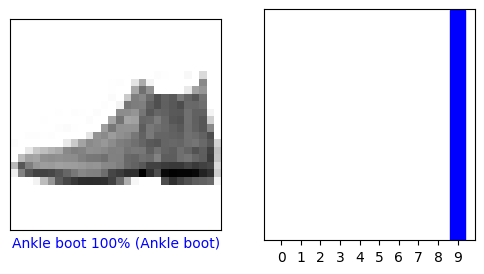

In [ ]:
# 17
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

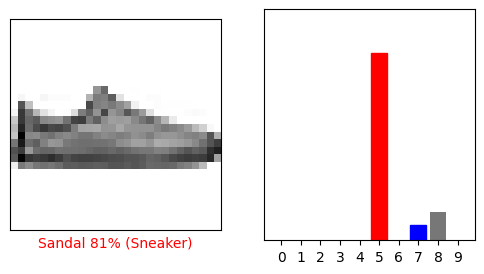

In [ ]:
# 18
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


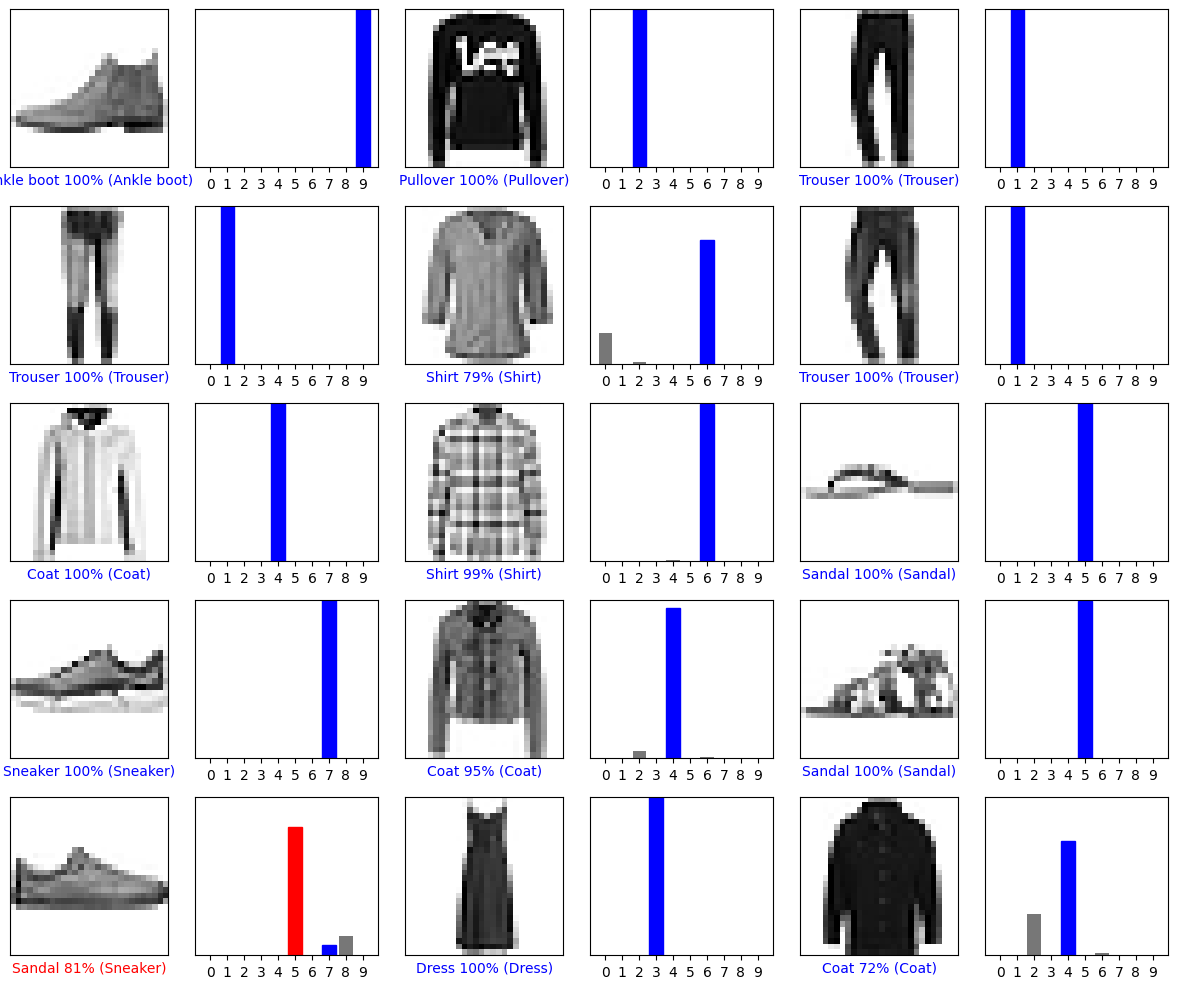

In [ ]:
# 19 Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

:Use the trained Model: Finally, use the trained model to make a prediction about a single image.



In [ ]:
# 20 Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
# 21 Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
# 22
predictions_single = probability_model.predict(img)

print(predictions_single)


1/1 [==============================] - 0s 24ms/step
[[1.8798028e-05 1.6310533e-12 9.9844009e-01 2.8762686e-13 1.3515323e-03
  1.1080509e-12 1.8957653e-04 2.3320380e-17 1.7055508e-09 1.3260351e-11]]


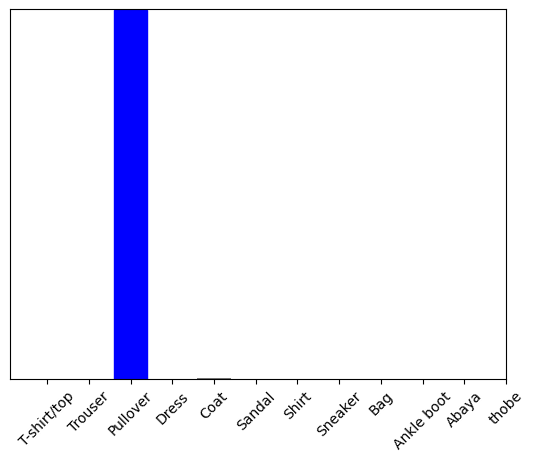

In [ ]:
# 23

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(12), class_names, rotation=45)
plt.show()

In [ ]:
# 24
np.argmax(predictions_single[0])

2

Everything I've ran so far was an exact replica of the Tensorflow "Basic Classification: Classify image of Clothing" Tutorial. In this section, I'll be expanding on that tutorial by adding three new labels, which are Abaya, Thobe, and Hijab

**Mount My Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Necessary Liibraries for Transfer Learning**





In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.optimizers import Adam
import numpy as np

**Collect and Preprocess the Images for the new Labels**:

Preprocessing Steps: 

1. resize to 28x28 pixels
2. convert the images to greyscale
3. normal the pixel values to be between 0 and 1

Due to limited resources, only a 100 image of each label were collected.

---



In [ ]:
import cv2
abaya_images = []
for filename in os.listdir("/content/drive/MyDrive/School/Winter2023/CIS579/ProjectCIS579/ProjectImages/abayaimages"):
    path = os.path.join("/content/drive/MyDrive/School/Winter2023/CIS579/ProjectCIS579/ProjectImages/abayaimages", filename)
    img = cv2.imread(path)
    img = cv2.resize(img, (28, 28))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = np.expand_dims(img, axis=-1) / 255.0
    abaya_images.append(img)

abaya_images = np.array(abaya_images)
abaya_images = abaya_images[...,0]


In [ ]:
thobe_images = []
for filename in os.listdir("/content/drive/MyDrive/School/Winter2023/CIS579/ProjectCIS579/ProjectImages/thobeimages"):
    path = os.path.join("/content/drive/MyDrive/School/Winter2023/CIS579/ProjectCIS579/ProjectImages/thobeimages", filename)
    img = cv2.imread(path)
    img = cv2.resize(img, (28, 28))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = np.expand_dims(img, axis=-1) / 255.0
    thobe_images.append(img)

thobe_images = np.array(thobe_images)
thobe_images = thobe_images[...,0]

In [ ]:
hijab_images = []
for filename in os.listdir("/content/drive/MyDrive/School/Winter2023/CIS579/ProjectCIS579/ProjectImages/hijabimages"):
    path = os.path.join("/content/drive/MyDrive/School/Winter2023/CIS579/ProjectCIS579/ProjectImages/hijabimages", filename)
    img = cv2.imread(path)
    img = cv2.resize(img, (28, 28))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = np.expand_dims(img, axis=-1) / 255.0
    hijab_images.append(img)


hijab_images = np.array(hijab_images)
hijab_images = hijab_images[...,0]

**Label the images using the numbers 10, 11, 12:**

Since the class names for the previous images ranged from 0 to 9, the new added labels - abaya, thobe, and hijab - will have class names 10, 11, and 12, respectively. 



In [ ]:
# Collect and preprocess the "abaya" images
abaya_labels = np.ones((99,), dtype=int) * 10 # "abaya" label is 10


In [ ]:
# Collect and preprocess the "thobe" images
thobe_labels = np.ones((99,), dtype=int) * 11 # "thobe" label is 11


In [ ]:
# Collect and preprocess the "hijab" images
hijab_labels = np.ones((99,), dtype=int) * 12 # "hijab" label is 12


**Now, we add the three new labels into the original "class_names" list**

The integer labels, which now range from 0 to 12, map the items found in this list 








In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot', 'Abaya', 'thobe', 'hijab']

**For demonstration purposes, I plotted the first 25 images of each new label after they have been preprocessed:**

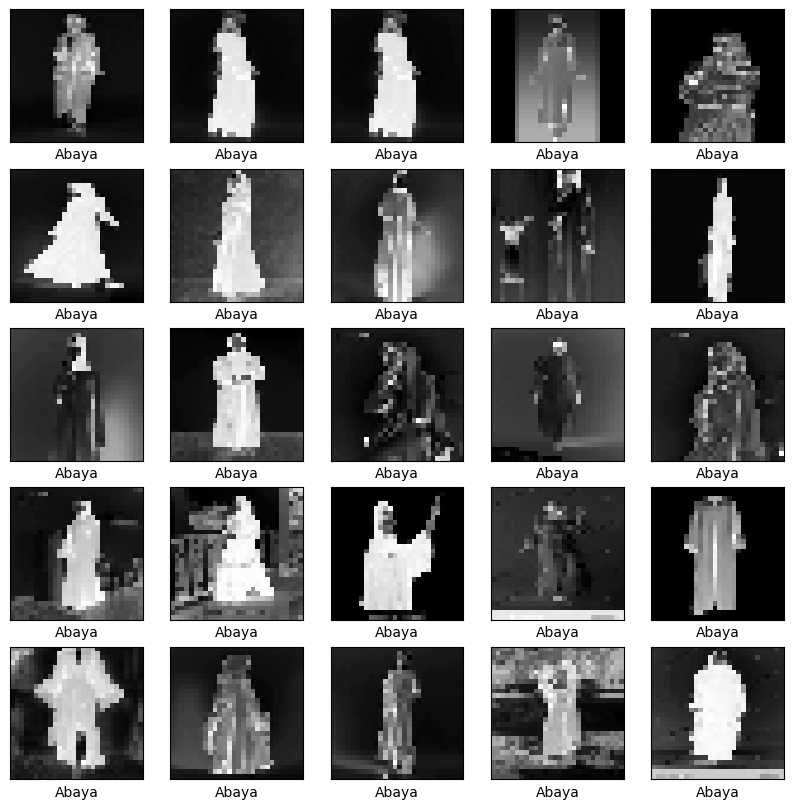

In [ ]:
# Abaya preprocessed images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(abaya_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[abaya_labels[i]])
plt.show()

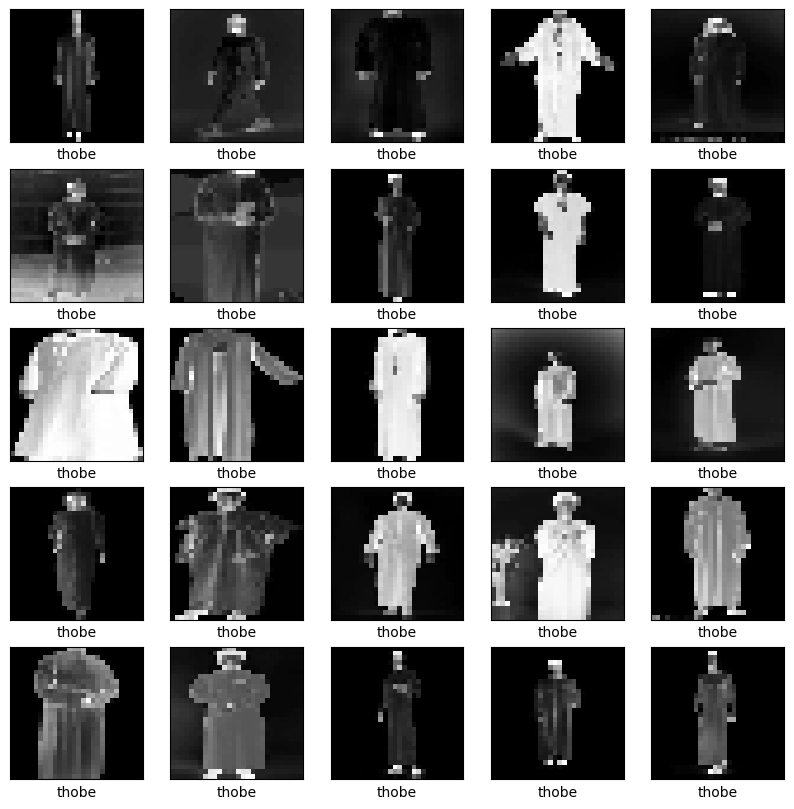

In [ ]:
# thobe preprocessed images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(thobe_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[thobe_labels[i]])
plt.show()

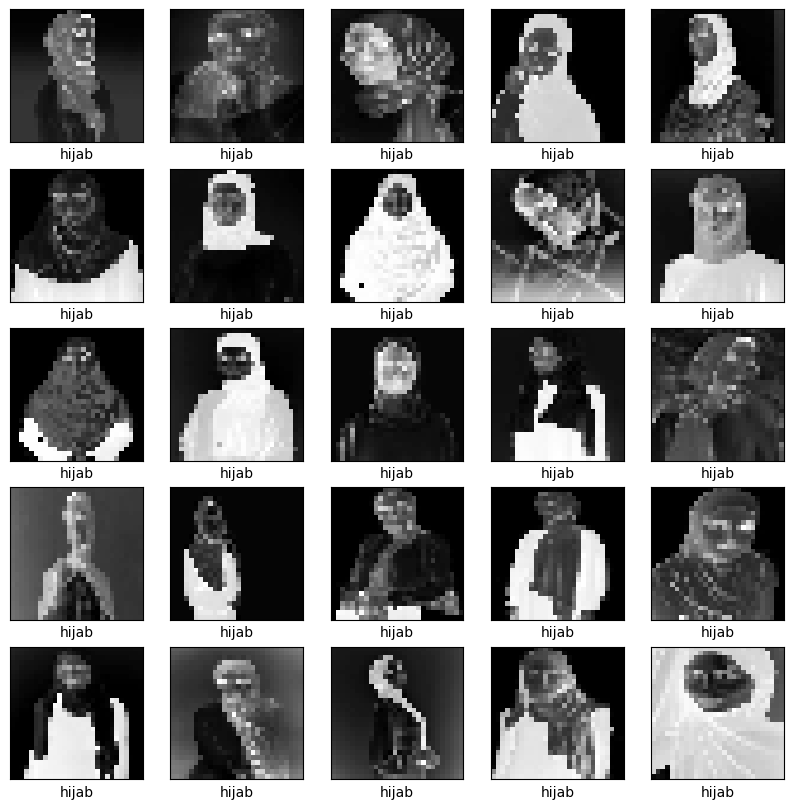

In [ ]:
# Hijab preprocessed images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(hijab_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[hijab_labels[i]])
plt.show()

**Now, we split the images for the three new labels into training and testing sets**

In [ ]:
# split the "abaya images" into training and testing:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(abaya_images, abaya_labels, test_size=0.2, random_state=42)


In [ ]:
# split the "thobe images" into training and testing:

X_traint, X_testt, y_traint, y_testt = train_test_split(thobe_images, thobe_labels, test_size=0.2, random_state=42)

In [ ]:
# split the "hijab images" into training and testing:

X_trainh, X_testh, y_trainh, y_testh = train_test_split(hijab_images, hijab_labels, test_size=0.2, random_state=42)

**To be able to train the model, all training data needs to be stored in one list.**
**Therefore, we concatenate all the new labels' training and testing data into one list, along with the previous training images and training labels.**


In [ ]:
#concatenate all X_train, y_train, X_test, y_test, for the abaya, thobe, and hijab training and testing data into single combined lists
import numpy as np

X_train_combined = np.concatenate((X_train, X_traint, X_trainh), axis=0)
y_train_combined = np.concatenate((y_train, y_traint, y_trainh), axis=0)
X_test_combined = np.concatenate((X_test, X_testt, X_testh), axis=0)
y_test_combined = np.concatenate((y_test, y_testt, y_testh), axis=0)



In [ ]:
train_images_all = np.concatenate((train_images, X_train_combined), axis=0)


In [ ]:
train_labels_all= np.concatenate((train_labels, y_train_combined), axis=0)


In [ ]:
test_images_all = np.concatenate((test_images, X_test_combined), axis=0)

In [ ]:
test_labels_all = np.concatenate((test_labels, y_test_combined), axis=0)


**The following steps are similar to what we did to the original model, which include:**

1. Building the Model
2. Compiling the Model
3. Training the Model
4. Evaluating Accuracy
5. Making Predicitions 

**the only difference is that the new labels' data is added into the training and testing sets.**


In [ ]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(13) #change this to 13 because we added the abaya label and thobe label and hijab label
])


In [ ]:
model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model4.fit(train_images_all, train_labels_all, epochs=10)


Epoch 1/10
1883/1883 [==============================] - 9s 4ms/step - loss: 0.5130 - accuracy: 0.8223
Epoch 2/10
1883/1883 [==============================] - 7s 4ms/step - loss: 0.3812 - accuracy: 0.8633
Epoch 3/10
1883/1883 [==============================] - 9s 5ms/step - loss: 0.3410 - accuracy: 0.8759
Epoch 4/10
1883/1883 [==============================] - 8s 4ms/step - loss: 0.3189 - accuracy: 0.8828
Epoch 5/10
1883/1883 [==============================] - 9s 5ms/step - loss: 0.3001 - accuracy: 0.8889
Epoch 6/10
1883/1883 [==============================] - 7s 4ms/step - loss: 0.2850 - accuracy: 0.8932
Epoch 7/10
1883/1883 [==============================] - 9s 5ms/step - loss: 0.2713 - accuracy: 0.8989
Epoch 8/10
1883/1883 [==============================] - 7s 4ms/step - loss: 0.2613 - accuracy: 0.9032
Epoch 9/10
1883/1883 [==============================] - 9s 5ms/step - loss: 0.2520 - accuracy: 0.9064
Epoch 10/10
1883/1883 [==============================] - 8s 4ms/step - loss: 0.242

**I wanted to calculate the accuracy of my model after the data for the new classes has been added.** 

In [ ]:
test_loss4, test_acc4 = model4.evaluate(test_images_all,  test_labels_all, verbose=2)

print('\nTest accuracy:', test_acc)


315/315 - 1s - loss: 0.3363 - accuracy: 0.8850 - 563ms/epoch - 2ms/step

Test accuracy: 0.886900007724762


**The testing accuracy hasnt changed from the original, so it's safe to assume that our new added data hasnt negatively affected the training process of the model**

In [ ]:
probability_model4 = tf.keras.Sequential([model4, 
                                         tf.keras.layers.Softmax()])


In [ ]:
predictions4 = probability_model4.predict(test_images_all)


315/315 [==============================] - 1s 2ms/step


**let's check whether the model is still capable of correctly predicting the label of the first image**

In [ ]:
predictions4[0] 

array([7.6140040e-08, 1.0162203e-12, 3.0647718e-10, 3.2407178e-11,
       1.7910485e-09, 7.4768014e-04, 1.1877054e-09, 9.8990621e-03,
       6.0193767e-10, 9.8935318e-01, 3.7701335e-15, 8.9687270e-17,
       3.9967422e-14], dtype=float32)

In [ ]:
np.argmax(predictions4[0])


9

In [ ]:
test_labels[0]


9

**The model is still capable of correctly predicting the label of the first image, which shows that the added data hasnt affected the training process negatively**.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(13))  #change the range to 13
  plt.yticks([])
  thisplot = plt.bar(range(13), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


**Here's a visualization of the first predication made:**




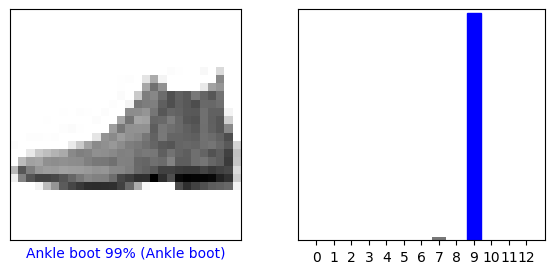

In [ ]:
i = 0
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plot_image(i, predictions4[i], test_labels_all, test_images_all)
plt.subplot(1,2,2)
plot_value_array(i, predictions4[i],  test_labels_all)
plt.show()

**And Here's a visualization of the 12th prediction made:**

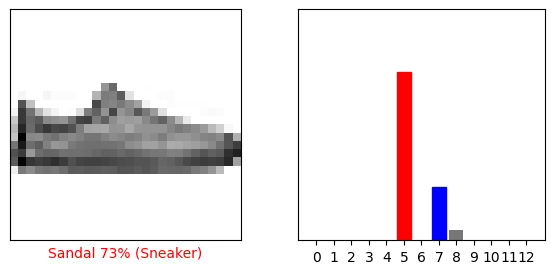

In [ ]:
i = 12
plt.figure(figsize=(7,3)) #analyze the probabilities
plt.subplot(1,2,1)
plot_image(i, predictions4[i], test_labels_all, test_images_all)
plt.subplot(1,2,2)
plot_value_array(i, predictions4[i],  test_labels_all)
plt.show()

**Both predictions have remained the same, further strengthing the assumption that our model hasnt lost its functionality after adding the new data.**

**Now, lets test the models ability to predict the new data correctly.**

In [ ]:
# Grab an image from the test dataset for the hijab dataset
img1 = test_images_all[10050]

print(img1.shape)


(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img1 = (np.expand_dims(img1,0))

print(img.shape)


(1, 28, 28)


In [ ]:
predictions_single4 = probability_model4.predict(img1)

print(predictions_single4)


1/1 [==============================] - 0s 37ms/step
[[9.97213720e-05 3.30174635e-06 4.60829324e-05 3.76593489e-05
  1.20365316e-04 1.85477623e-11 4.33992536e-05 9.35461561e-13
  2.77064173e-05 1.23062893e-08 6.89632177e-01 5.64080775e-02
  2.53581524e-01]]


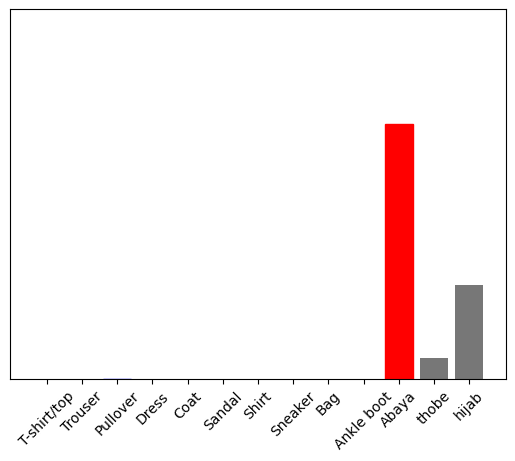

In [ ]:
plot_value_array(1, predictions_single4[0], test_labels_all)
_ = plt.xticks(range(13), class_names, rotation=45)
plt.show()


**The model is having trouble distinguishing between Abaya and hijab, mainly due to the fact that the images of both labels look similar after preprocessing.**

**Now, let's test how it performs on predicting the labels for the abaya class**

In [ ]:
img2 = test_images_all[10000]

In [ ]:
# Add the image to a batch where it's the only member.
img2 = (np.expand_dims(img2,0))

print(img2.shape)


(1, 28, 28)


In [ ]:
predictions_single5 = probability_model4.predict(img2)

print(predictions_single5)


1/1 [==============================] - 0s 28ms/step
[[1.52773595e-07 3.11972947e-11 8.65607142e-09 1.55843491e-17
  5.65038905e-09 9.26014690e-13 6.91052060e-09 1.05374985e-17
  9.14291559e-12 1.87817982e-20 9.81840551e-01 1.80397555e-02
  1.19668272e-04]]


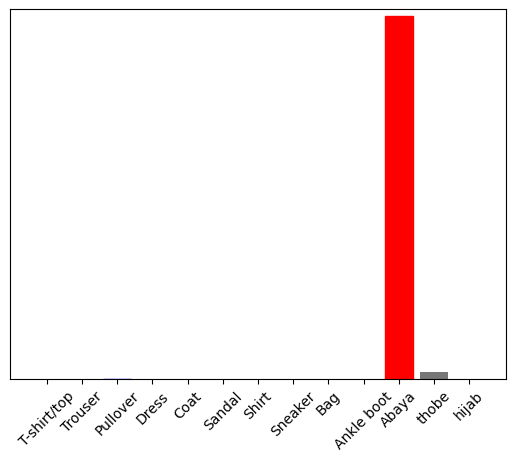

In [ ]:
plot_value_array(1, predictions_single5[0], test_labels_all)
_ = plt.xticks(range(13), class_names, rotation=45)
plt.show()

**The model has be able to successfully classify abaya images.**

**Lastly, let's check its ability to predict the labels for the thobe class correctly**

In [ ]:
img3 = test_images_all[1023]

In [ ]:
# Add the image to a batch where it's the only member.
img3 = (np.expand_dims(img3,0))

print(img3.shape)


(1, 28, 28)


In [ ]:
predictions_single6 = probability_model4.predict(img3)

print(predictions_single6)


1/1 [==============================] - 0s 38ms/step
[[6.23603626e-07 1.10057525e-04 6.02423370e-07 1.24233583e-08
  3.12616844e-09 5.25432791e-15 7.14771159e-06 5.27681327e-12
  1.67411068e-11 1.53870325e-13 5.16813099e-01 4.83068407e-01]]


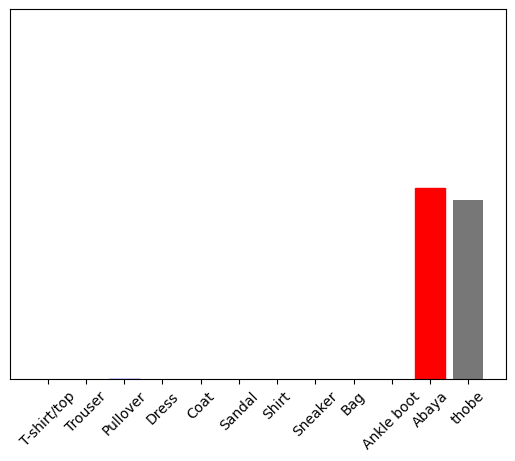

In [ ]:
plot_value_array(1, predictions_single6[0], test_labels_all)
_ = plt.xticks(range(13), class_names, rotation=45)
plt.show()


**It's classifying the thobe image with Abaya and thobe equally, which makes sense since the preprocessed images for both classes look almost identical**